In [71]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
#import tf.keras as keras


In [72]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [73]:
x_train.shape

(60000, 28, 28)

In [74]:
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

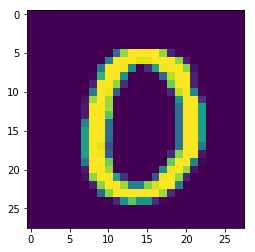

In [78]:
plt.imshow(x_train[10])

In [79]:
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [80]:
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


In [81]:
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)


In [36]:
model = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
# Take a look at the model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1568)              0         
__________

In [37]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [39]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)

ModuleNotFoundError: No module named 'keras'

In [47]:
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)

In [48]:
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 69s 1ms/step - loss: 3.1733 - acc: 0.6422 - val_loss: 0.4950 - val_acc: 0.8332

Epoch 00001: val_loss improved from inf to 0.49503, saving model to model.weights.best.hdf5
Epoch 2/10
55000/55000 [==============================] - 11s 202us/step - loss: 0.5486 - acc: 0.7988 - val_loss: 0.3828 - val_acc: 0.8650

Epoch 00002: val_loss improved from 0.49503 to 0.38278, saving model to model.weights.best.hdf5
Epoch 3/10
55000/55000 [==============================] - 11s 204us/step - loss: 0.4674 - acc: 0.8279 - val_loss: 0.3363 - val_acc: 0.8804

Epoch 00003: val_loss improved from 0.38278 to 0.33627, saving model to model.weights.best.hdf5
Epoch 4/10
55000/55000 [==============================] - 11s 201us/step - loss: 0.4329 - acc: 0.8394 - val_loss: 0.3260 - val_acc: 0.8812

Epoch 00004: val_loss improved from 0.33627 to 0.32595, saving model to model.weights.best.hdf5
Epoch 5/10
55

In [49]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

In [64]:
# Evaluate the model on test set
score = model.evaluate(x_test,y_test, verbose=1)

10000/10000 [==============================] - 1s 87us/step


In [65]:
# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.8972


In [51]:
type(score)

list

In [52]:
score


[0.2851205890059471, 0.8972]

In [60]:
y_2 = model.predict(x_test,batch_size=5)

In [61]:
y_2.shape

(10000, 10)

In [56]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [109]:
model2 = keras.Sequential()
# Must define the input shape in the first layer of the neural network
model2.add(keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1))) 
model2.add(keras.layers.MaxPooling2D(pool_size=2))
model2.add(keras.layers.Dropout(0.3))
model2.add(keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model2.add(keras.layers.MaxPooling2D(pool_size=2))
model2.add(keras.layers.Dropout(0.3))
model2.add(keras.layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'))
model2.add(keras.layers.MaxPooling2D(pool_size=2))
model2.add(keras.layers.Dropout(0.3))
model2.add(keras.layers.Flatten())
model2.add(keras.layers.BatchNormalization())
model2.add(keras.layers.Dense(256, activation='relu'))
model2.add(keras.layers.Dropout(0.5))
model2.add(keras.layers.BatchNormalization())
model2.add(keras.layers.Dense(100, activation='relu'))
model2.add(keras.layers.Dense(10, activation='softmax'))
# Take a look at the model summary
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 7, 7, 16)          4624      
__________

In [110]:
model2.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [111]:
model2.fit(x_train,
         y_train,
         batch_size=64,
         epochs=3,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Train on 55000 samples, validate on 5000 samples
Epoch 1/3
55000/55000 [==============================] - 18s 320us/step - loss: 0.6711 - acc: 0.7779 - val_loss: 0.1007 - val_acc: 0.9682

Epoch 00001: val_loss did not improve
Epoch 2/3
55000/55000 [==============================] - 16s 291us/step - loss: 0.2215 - acc: 0.9306 - val_loss: 0.0636 - val_acc: 0.9806

Epoch 00002: val_loss did not improve
Epoch 3/3
55000/55000 [==============================] - 16s 292us/step - loss: 0.1601 - acc: 0.9494 - val_loss: 0.0518 - val_acc: 0.9860

Epoch 00003: val_loss did not improve


In [116]:
score = model2.evaluate(x_test,y_test, verbose=1)

10000/10000 [==============================] - 1s 108us/step


In [117]:
score

[0.04589727868754417, 0.985]